# Assignment: 5.2 Exercise: Sentiment Analysis and Preprocessing Text
 

**You will build a model with the movie reviews dataset that you worked with in Week 3: Bag of Words Meets Bags of Popcorn.**
<br>1.Get the stemmed data using the same process you did in Week 3.
<br>2.Split this into a training and test set.
<br>3.Fit and apply the tf-idf vectorization to the training set.
<br>4.Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).
<br>5.Train a logistic regression using the training data.
<br>6.Find the model accuracy on test set.
<br>7.Create a confusion matrix for the test set predictions.
<br>8.Get the precision, recall, and F1-score for the test set predictions.
<br>9.Create a ROC curve for the test set.
<br>11.Pick another classification model you learned about this week and repeat steps (5) – (9).

**Import Libraries**

In [43]:
#preloading necessary packages
import pandas as pd 
import numpy as np
import re as re
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import html

###### 1.Get the stemmed data using the same process you did in Week 3.

In [9]:
#Loading data into data frame
train = pd.read_csv('labeledTrainData.tsv.zip', delimiter="\t")

In [10]:
#checking train data
train.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


**Data frame contents**

File descriptions:
labeledTrainData - The labeled training set. The file is tab-delimited and has a header row followed by 25,000 rows containing an id, sentiment, and text for each review.  

Data fields:
<br>id - Unique ID of each review
<br>sentiment - Sentiment of the review; 1 for positive reviews and 0 for negative reviews
<br>review - Text of the review

###### How many of each positive and negative reviews are there? 

In [11]:
#Checking coungs of positive and negative reviews
print("Number of rows in the data set with positive reviews in dataset :", sum(train['sentiment'] == 1))
print("Number of rows in the data set with Negative reviews in dataset :", sum(train['sentiment'] == 0))

Number of rows in the data set with positive reviews in dataset : 12500
Number of rows in the data set with Negative reviews in dataset : 12500


**Part 2: Prepping Text**

###### Clean Data
<br>1. Convert all text to lowercase letters. 
<br>2. Remove punctuation and special characters from the text. 
<br>3. Remove stop words. 

In [12]:
#creating function to clean text
def clean_text(text):
    text = BeautifulSoup(text).get_text() #beautifying text
    letters_only = re.sub("[^a-zA-Z]", " ", text) # clean the html charecters (non text)
    words = letters_only.lower().split()   # convert to lower text                        
    stops = set(stopwords.words("english")) # setting stop words to remove                  
    main_words = [w for w in words if not w in stops]   
    return( " ".join( main_words )) 

In [13]:
#applying clean function on the data frame and creating a new column with clean text
train['clean_review'] = train['review'].apply(clean_text)

######  Apply NLTK’s PorterStemmer.

In [14]:
# import these modules
from nltk.stem import PorterStemmer

In [15]:
#Applying porterstemmer on clean_review
ps = PorterStemmer()
train['clean_review'] = train['clean_review'].apply(lambda review: ps.stem(review))

In [16]:
from nltk import word_tokenize # importing word_tokenize
#extracting and prinitng tokenized values sample
corpora = train['clean_review'].values
tokenized = [word_tokenize(corpus) for corpus in corpora]

print(tokenized[2222])

['go', 'immediately', 'rent', 'movie', 'bottom', 'shelf', 'local', 'video', 'store', 'covered', 'dust', 'one', 'touched', 'years', 'may', 'even', 'special', 'worth', 'ten', 'bucks', 'swear', 'buy', 'many', 'films', 'compare', 'celluloid', 'version', 'goo', 'forms', 'bottom', 'trash', 'years', 'yes', 'gave', 'really', 'deserves', 'much', 'lower', 'scales', 'designed', 'stuff', 'like', 'mind']


In [17]:
#shape of train data frame
train.shape

(25000, 4)

###### 2.Split this into a training and test set.

In [29]:
#import Necessary libraries
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [34]:
#Select Predictor columns
X = train[['id','clean_review']]

#Select target column
y = train['sentiment']

names = [
       'sentiment'
    , 'id', 'review'
]

In [35]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

###### 3. Fit and apply the tf-idf vectorization to the training set.

In [53]:
#Creating bag_of_words matrix from clean review
count = CountVectorizer()
bag_of_words_train = count.fit_transform(X_train['clean_review'])

In [54]:
bag_of_words_train #Size of bag_of_words

<20000x68774 sparse matrix of type '<class 'numpy.int64'>'
	with 1956363 stored elements in Compressed Sparse Row format>

In [55]:
# Import tf-idf encoding from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

# Define some hiperparameters of encoded
vectorizer = TfidfVectorizer()

# Create the training set with the words encoded as features of the reviews
train_data_features = vectorizer.fit_transform(X_train['clean_review'])

print(train_data_features.shape)

(20000, 68774)


As above shows the shape (20000, 68774) matches the bag_of_words shape from above

##### 4.Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).

In [49]:
bag_of_words_test = count.fit_transform(X_test['clean_review'])

In [50]:
bag_of_words_test

<5000x38949 sparse matrix of type '<class 'numpy.int64'>'
	with 489781 stored elements in Compressed Sparse Row format>

we dont fit the tf-idf vectorization on test data, as we would be predicting the sentiment value - by applying the model we trained on train data

###### 5. Train a logistic regression using the training data.

In [64]:
# Import the logistic regression model from sklearn 
from sklearn.linear_model import LogisticRegression

# Define the model
model = LogisticRegression(random_state=0, solver='lbfgs',
                            multi_class='multinomial')
# Train model
model.fit(train_data_features, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

###### 6. Find the model accuracy on test set.

In [52]:
###### Testing the model against entire train data from origianl train data

In [75]:
# Read the test data

print(X_test.shape)


# Create the test set with the words encoded as features of the reviews
test_data_features_test = vectorizer.transform(X_test['clean_review'])


# Use the logistic regression model to make sentiment label predictions
result_lr = model.predict(test_data_features_test)

# Copy the results to a pandas dataframe with an "id" column and a "sentiment" column
output = pd.DataFrame( data={"id":X_test["id"],"sentiment_calc":result_lr,"train_sentiment":y_test})
output.head()

(5000, 2)


,id,sentiment_calc,train_sentiment
18472,4292_3,0,0
9846,7976_7,1,1
10185,5218_7,1,1
5110,4718_7,1,1
8033,2400_3,0,0


In [78]:
#Calculating positive and negative review sentiment analysis count by Logistics Regression
print("Number of rows in the data set with positive reviews in dataset per Logistics Regression model :", sum(output['sentiment_calc'] > 0))
print("Number of rows in the data set with Negative reviews in dataset per Logistics Regression model :", sum(output['sentiment_calc'] == 0))

Number of rows in the data set with positive reviews in dataset per Logistics Regression model : 2593
Number of rows in the data set with Negative reviews in dataset per Logistics Regression model : 2407


In [79]:
#Calculating Accuracy of custom model where labelled test data and Logistics Regression prediction for sentiment are matching
print("Accurate positive sentiment prediction by Logistics Regression model :", sum((output['sentiment_calc'] == 1) & (output['train_sentiment'] == 1)))
print("Accurate negative sentiment prediction by Logistics Regression model :", sum((output['sentiment_calc'] == 0) & (output['train_sentiment'] == 0)))

Accurate positive sentiment prediction by Logistics Regression model : 2256
Accurate negative sentiment prediction by Logistics Regression model : 2189


Total number of agreements by custom model:  2256+2189 = 4445
<br>Total number of samples: 5000
<br> Accuracy of Logistics regression = (4445/5000)*100 = 88.9%
<br>Accuracy of Logistics regression is about 88.9%. This is definitely better than random guessing as it would be a 50% accurate model with either yes or no. 


##### 7.Create a confusion matrix for the test set predictions.

In [81]:
confusion_matrix = pd.crosstab(output['train_sentiment'], output['sentiment_calc'] , rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted     0     1
Actual               
0          2189   337
1           218  2256


###### 8. Get the precision, recall, and F1-score for the test set predictions.

**Precision** = (True Positive)/(True Positive + False Positive) = 2256/(2256+337) = 2256/2593= **0.87**
<br>**Recall** = (True Positive)/(True Positive + False Negative) = 2256/(2256+218) = 2256/2474 = **0.912**
<br>**F1-Score** = 2((Precison * Recall)/(Precision + Recall)) = 2 ((0.87 * 0.912)/(0.87 + 0.912)) = 2 (0.7934/1.782) = **0.89**

##### 8.Create a ROC curve for the test set

In [85]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

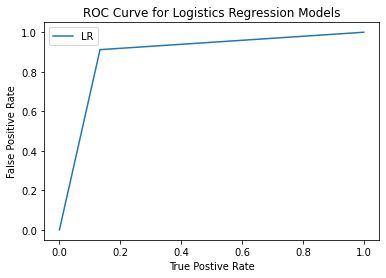

In [86]:
y_pred_list = [result_lr]
label_list = ["LR"]
pred_label = zip(y_pred_list, label_list)
for y_pred, lbl in pred_label:
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label = lbl)

plt.xlabel("True Postive Rate")
plt.ylabel("False Positive Rate")
plt.title("ROC Curve for Logistics Regression Models")
plt.legend()
plt.show()

##### 9.Pick another classification model you learned about this week and repeat steps (5) – (9).

In [97]:
#Random Forrest
# Load libraries
from sklearn.ensemble import RandomForestClassifier
#Param Grid
param_grid = {'n_estimators':[x for x in range(100,1000)],'criterion':['gini', 'entropy'],'min_samples_split':[2,5,10],'min_samples_leaf':[2,5,10] }

In [98]:
# Vectorize Test data
train_data_features_rf = vectorizer.fit_transform(X_train['clean_review'])

In [99]:
# Train a radius neighbors classifier
clf = RandomForestClassifier(n_estimators= 500)
clf.fit(train_data_features_rf,y_train)
print(clf.score(train_data_features_rf,y_train))

1.0


In [101]:
# Test Random Forest Model
# Read the test data
print(X_test.shape)
# Create the test set with the words encoded as features of the reviews
test_data_features_test_rf = vectorizer.transform(X_test['clean_review'])


# Use the logistic regression model to make sentiment label predictions
result_rf = clf.predict(test_data_features_test_rf)

# Copy the results to a pandas dataframe with an "id" column and a "sentiment" column
output_rf = pd.DataFrame( data={"id":X_test["id"],"sentiment_calc":result_rf,"train_sentiment":y_test})
output_rf.head()

(5000, 2)


,id,sentiment_calc,train_sentiment
18472,4292_3,0,0
9846,7976_7,1,1
10185,5218_7,0,1
5110,4718_7,1,1
8033,2400_3,0,0


In [102]:
#Calculating positive and negative review sentiment analysis count by RF
print("Number of rows in the data set with positive reviews in dataset per RF model :", sum(output_rf['sentiment_calc'] > 0))
print("Number of rows in the data set with Negative reviews in dataset per RF model :", sum(output_rf['sentiment_calc'] == 0))

Number of rows in the data set with positive reviews in dataset per RF model : 2532
Number of rows in the data set with Negative reviews in dataset per RF model : 2468


In [103]:
#Calculating Accuracy of custom model where labelled test data and RF prediction for sentiment are matching
print("Accurate positive sentiment prediction by RF model :", sum((output_rf['sentiment_calc'] == 1) & (output_rf['train_sentiment'] == 1)))
print("Accurate negative sentiment prediction by RF model :", sum((output_rf['sentiment_calc'] == 0) & (output_rf['train_sentiment'] == 0)))

Accurate positive sentiment prediction by RF model : 2152
Accurate negative sentiment prediction by RF model : 2146


Total number of agreements by custom model:  2152+2146 = 4298
<br>Total number of samples: 5000
<br> Accuracy of Logistics regression = (4298/5000)*100 = 85.96%
<br>Accuracy of Logistics regression is about 85.96%. This is definitely better than random guessing as it would be a 50% accurate model with either yes or no. 



In [105]:
#Confusion Matrix for RF
confusion_matrix_rf = pd.crosstab(output_rf['train_sentiment'], output_rf['sentiment_calc'] , rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix_rf)

Predicted     0     1
Actual               
0          2146   380
1           322  2152


**Precision** = (True Positive)/(True Positive + False Positive) = 2152/(2152+380) = 2152/2532= **0.85**
<br>**Recall** = (True Positive)/(True Positive + False Negative) = 2152/(2152+322) = 2152/2474 = **0.87**
<br>**F1-Score** = 2((Precison * Recall)/(Precision + Recall)) = 2 ((0.85 * 0.87)/(0.85 + 0.87)) = 2 (0.7395/1.72) = **0.86**

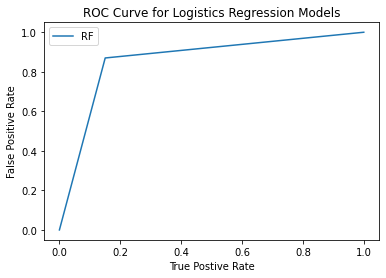

In [107]:
# ROC Curve for RF
y_pred_list = [result_rf]
label_list = ["RF"]
pred_label = zip(y_pred_list, label_list)
for y_pred, lbl in pred_label:
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label = lbl)

plt.xlabel("True Postive Rate")
plt.ylabel("False Positive Rate")
plt.title("ROC Curve for RF")
plt.legend()
plt.show()